In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt", 
                 delim_whitespace=True, 
                 header=None)

cols = ['unit', 'cycle'] + [f'os{i}' for i in range(1,4)] + [f'sensor{i}' for i in range(1,22)]
df.columns = cols

print(df.shape)
df.head()


(20631, 26)


/tmp/ipykernel_36/1065139405.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt",


,unit,cycle,os1,os2,os3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [62]:
print("Total engines:", df['unit'].nunique())
summary = df.groupby('unit')['cycle'].max().reset_index()
summary.columns = ['unit','lifetime']
summary.describe()


Total engines: 100


,unit,lifetime
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


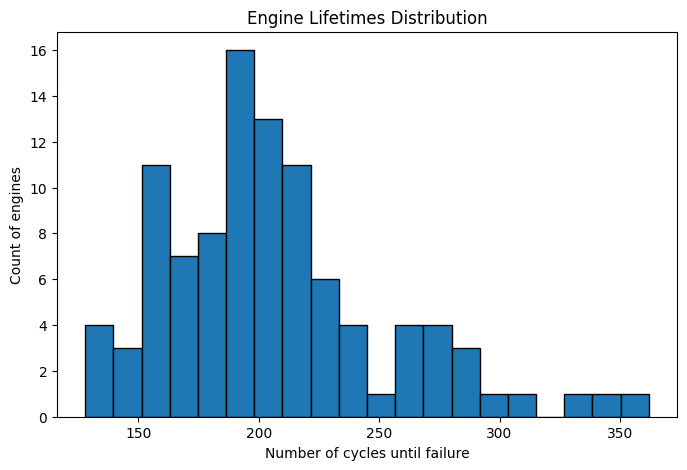

In [63]:
plt.figure(figsize=(8,5))
plt.hist(summary['lifetime'], bins=20, edgecolor='black')
plt.title("Engine Lifetimes Distribution")
plt.xlabel("Number of cycles until failure")
plt.ylabel("Count of engines")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


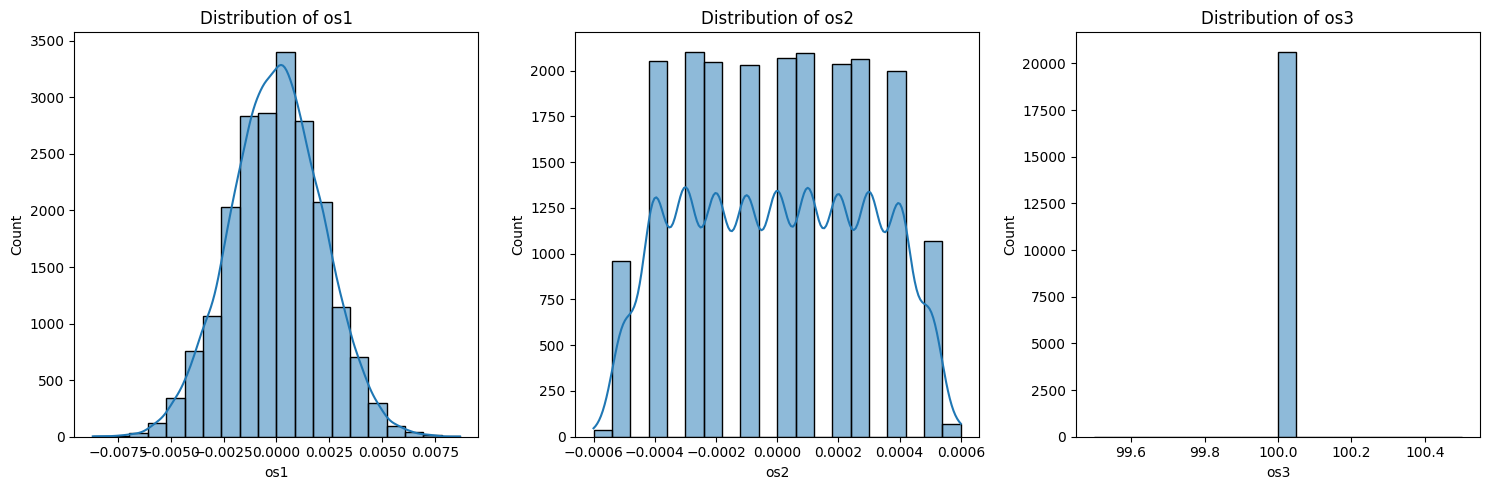

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(['os1','os2','os3']):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


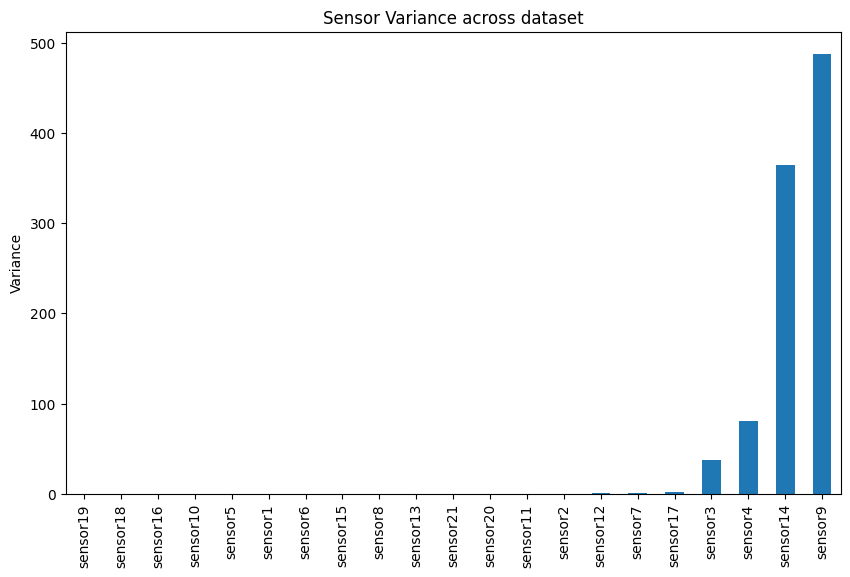

In [65]:
sensor_cols = [c for c in df.columns if 'sensor' in c]
variances = df[sensor_cols].var().sort_values()

plt.figure(figsize=(10,6))
variances.plot(kind='bar')
plt.title("Sensor Variance across dataset")
plt.ylabel("Variance")
plt.show()


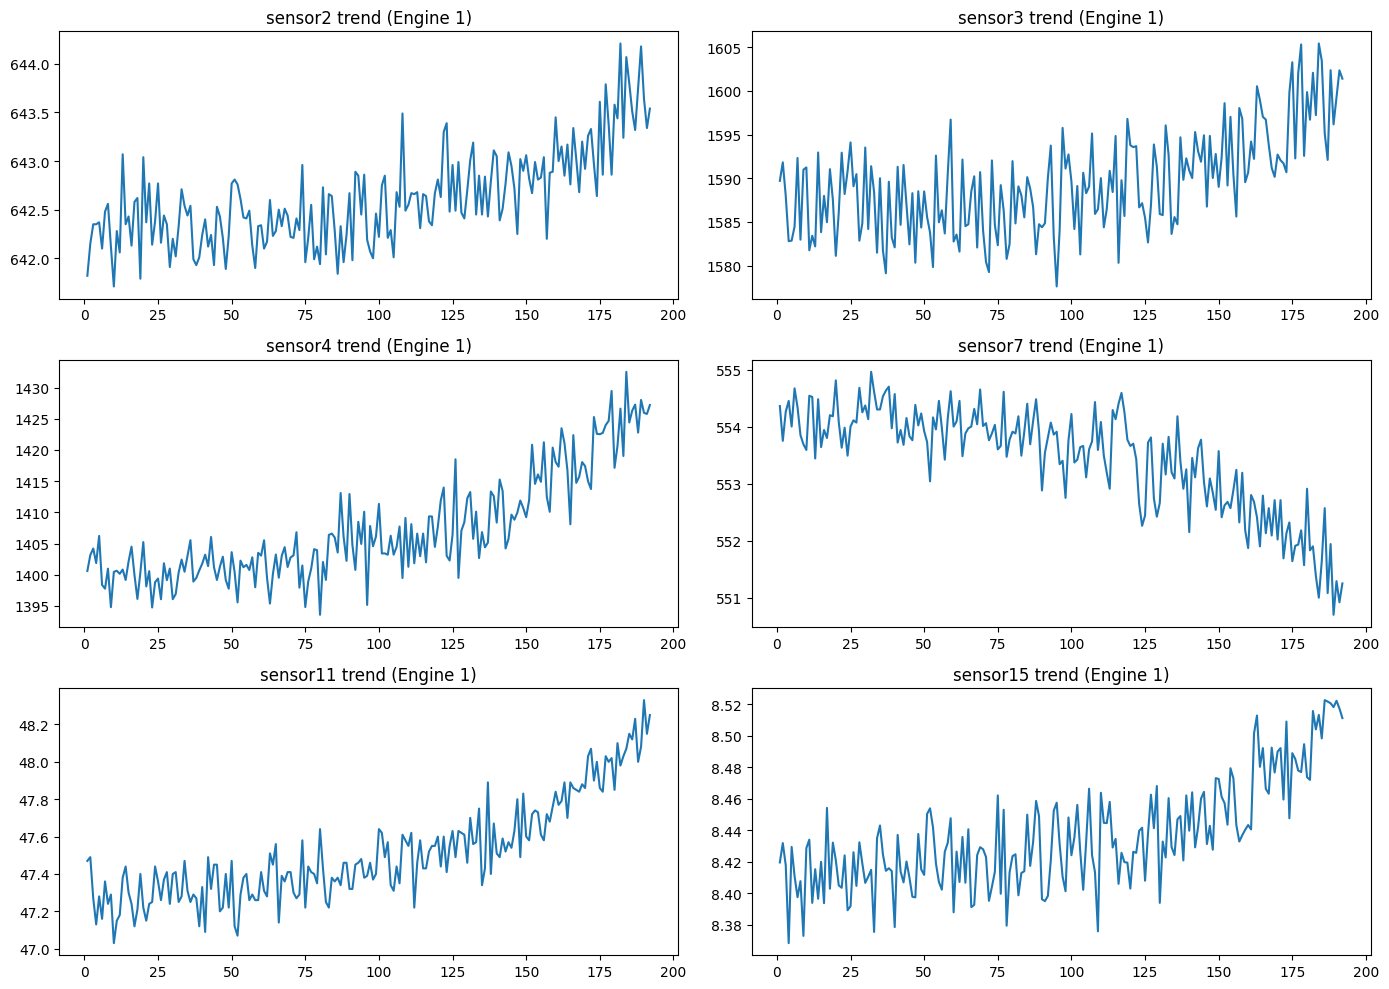

In [66]:
engine1 = df[df['unit']==1]
fig, axes = plt.subplots(3, 2, figsize=(14,10))

for i, s in enumerate(['sensor2','sensor3','sensor4','sensor7','sensor11','sensor15']):
    ax = axes[i//2, i%2]
    ax.plot(engine1['cycle'], engine1[s])
    ax.set_title(f"{s} trend (Engine 1)")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


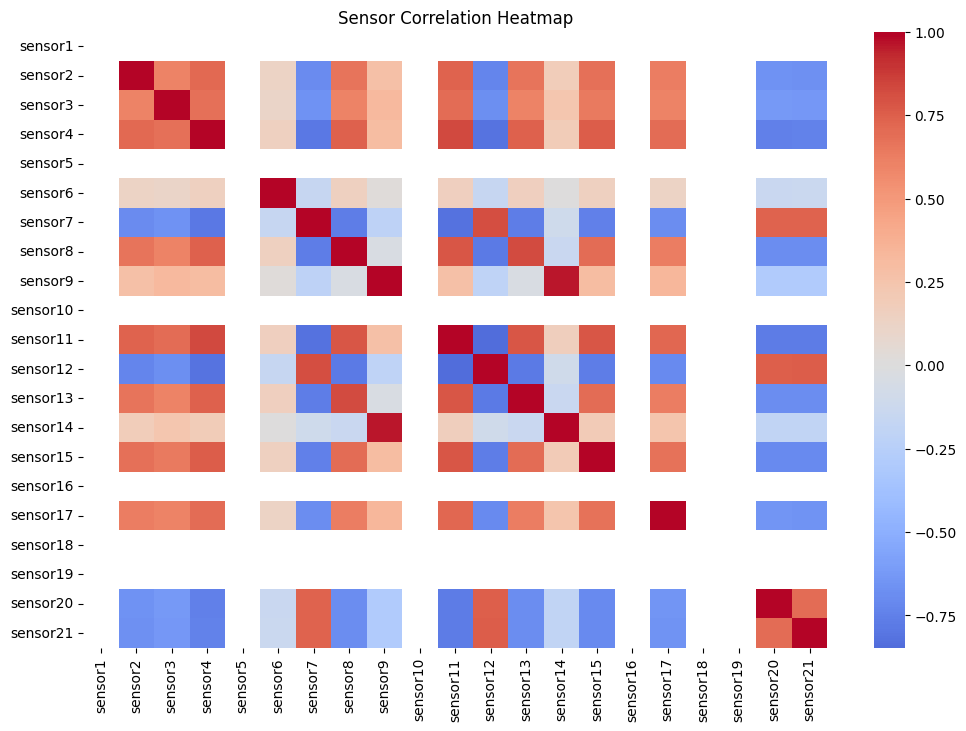

In [67]:
corr = df[sensor_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()


In [68]:
def label_normal_abnormal(df):
    labels = []
    for unit, group in df.groupby('unit'):
        cutoff = group['cycle'].max() // 2
        labels.extend([0 if c <= cutoff else 1 for c in group['cycle']])
    return labels

df['label'] = label_normal_abnormal(df)

df['label'].value_counts()


label
1    10341
0    10290
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

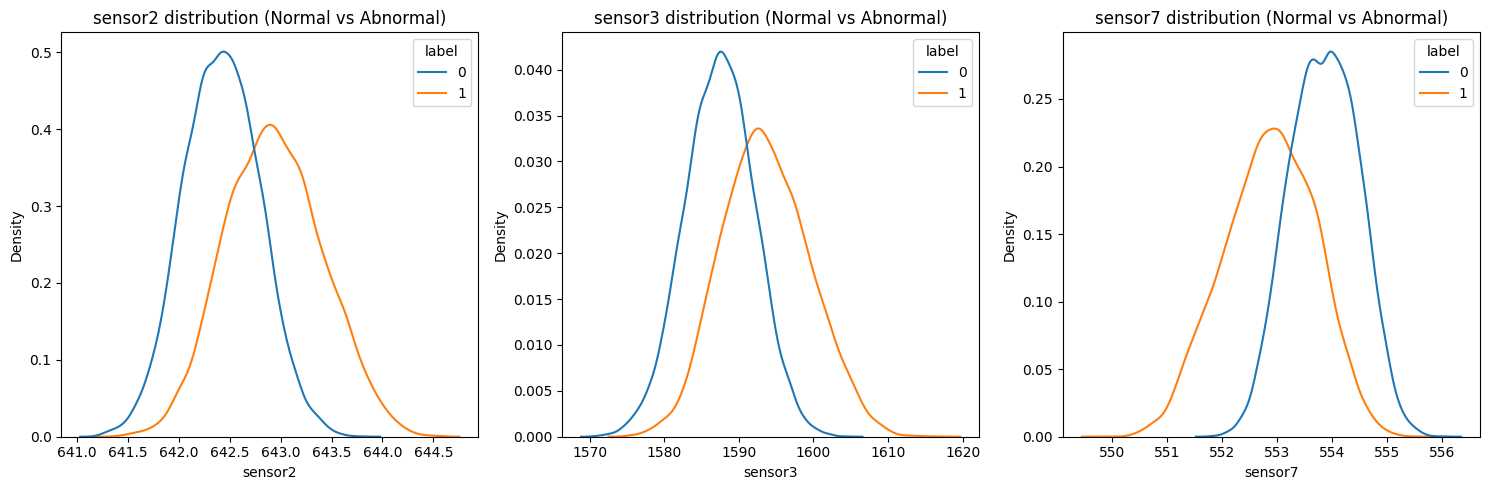

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, s in enumerate(['sensor2','sensor3','sensor7']):
    sns.kdeplot(data=df, x=s, hue='label', ax=axes[i])
    axes[i].set_title(f"{s} distribution (Normal vs Abnormal)")
plt.tight_layout()
plt.show()


In [70]:
df.to_csv("cmapss_prepared.csv", index=False)
print("Saved prepared dataset")


Saved prepared dataset


In [71]:
# Identify constant sensors
sensor_cols = [c for c in df.columns if 'sensor' in c]
constant_sensors = [c for c in sensor_cols if df[c].nunique() == 1]

print("Constant sensors:", constant_sensors)

# Drop them
df = df.drop(columns=constant_sensors)


Constant sensors: ['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sensor_cols = [c for c in df.columns if 'sensor' in c]

df[sensor_cols] = scaler.fit_transform(df[sensor_cols])


In [73]:
df.to_csv("cmapss_clean.csv", index=False)
print("Cleaned dataset saved as cmapss_clean.csv")


Cleaned dataset saved as cmapss_clean.csv


In [74]:
import numpy as np

def create_windows(df, window=25, stride=1, feature_cols=None, label_col="label"):
    """
    Convert engine data into sliding windows.
    
    Args:
        df: DataFrame with engine data
        window: size of each time window (default=25)
        stride: step size (default=1)
        feature_cols: list of feature columns (sensors + ops)
        label_col: column for anomaly label
    
    Returns:
        X: numpy array of shape (num_windows, window, num_features)
        y: numpy array of labels (0=normal, 1=anomaly)
    """
    if feature_cols is None:
        feature_cols = [c for c in df.columns if 'sensor' in c or 'os' in c]
    
    X, y = [], []
    for unit, group in df.groupby('unit'):
        group = group.reset_index(drop=True)
        for i in range(0, len(group)-window, stride):
            seq_x = group.loc[i:i+window-1, feature_cols].values
            seq_y = group.loc[i+window-1, label_col]   # label of last cycle in window
            X.append(seq_x)
            y.append(seq_y)
    return np.array(X), np.array(y)


In [75]:
feature_cols = [c for c in df.columns if 'sensor' in c or 'os' in c]
X, y = create_windows(df, window=25, stride=1, feature_cols=feature_cols, label_col="label")

print("X shape:", X.shape)   # (num_windows, 25, num_features)
print("y shape:", y.shape)   # (num_windows,)


X shape: (18131, 25, 18)
y shape: (18131,)


In [76]:
# Load test set
test_df = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt", 
                      delim_whitespace=True, header=None)

# Define columns (same as train)
cols = ['unit', 'cycle'] + [f'os{i}' for i in range(1,4)] + [f'sensor{i}' for i in range(1,22)]
test_df.columns = cols

# Add labels: first 50% = normal, last 50% = anomaly
def add_labels(df):
    labels = []
    for unit, group in df.groupby("unit"):
        cutoff = group["cycle"].max() // 2
        labels.extend([0 if c <= cutoff else 1 for c in group["cycle"]])
    df["label"] = labels
    return df

test_df = add_labels(test_df)
print(test_df.head())


   unit  cycle     os1     os2    os3  sensor1  sensor2  sensor3  sensor4  \
0     1      1  0.0023  0.0003  100.0   518.67   643.02  1585.29  1398.21   
1     1      2 -0.0027 -0.0003  100.0   518.67   641.71  1588.45  1395.42   
2     1      3  0.0003  0.0001  100.0   518.67   642.46  1586.94  1401.34   
3     1      4  0.0042  0.0000  100.0   518.67   642.44  1584.12  1406.42   
4     1      5  0.0014  0.0000  100.0   518.67   642.51  1587.19  1401.92   

   sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  \
0    14.62  ...   2388.03   8125.55    8.4052      0.03       392      2388   
1    14.62  ...   2388.06   8139.62    8.3803      0.03       393      2388   
2    14.62  ...   2388.03   8130.10    8.4441      0.03       393      2388   
3    14.62  ...   2388.05   8132.90    8.3917      0.03       391      2388   
4    14.62  ...   2388.03   8129.54    8.4031      0.03       390      2388   

   sensor19  sensor20  sensor21  label  
0     100.0     38.86

/tmp/ipykernel_36/3268439320.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt",


In [77]:
feature_cols = [c for c in test_df.columns if 'sensor' in c or 'os' in c]

X_test, y_test = create_windows(test_df, window=25, stride=1, 
                                feature_cols=feature_cols, label_col="label")

print("Test windows:", X_test.shape, y_test.shape)


Test windows: (10596, 25, 24) (10596,)


In [78]:
test_df = test_df.drop(columns=constant_sensors)

print("Test cleaned, same feature set as train")


Test cleaned, same feature set as train


In [79]:
print("Train columns:", df.shape[1])
print("Test columns:", test_df.shape[1])
assert list(df.columns) == list(test_df.columns), "Mismatch between train/test columns!"


Train columns: 21
Test columns: 21


In [80]:
from sklearn.model_selection import train_test_split

# Keep only normal data for training
X_normal = X[y == 0]
y_normal = y[y == 0]

print("Normal windows available:", X_normal.shape)


Normal windows available: (7890, 25, 18)


In [81]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_normal, y_normal, test_size=0.2, random_state=42, shuffle=True
)

print("Train:", X_train_final.shape, y_train_final.shape)
print("Val:", X_val.shape, y_val.shape)


Train: (6312, 25, 18) (6312,)
Val: (1578, 25, 18) (1578,)


In [82]:
feature_cols = [c for c in test_df.columns if 'sensor' in c or 'os' in c]

X_test, y_test = create_windows(test_df, window=25, stride=1, 
                                feature_cols=feature_cols, label_col="label")

print("Raw Test windows:", X_test.shape, y_test.shape)


Raw Test windows: (10596, 25, 18) (10596,)


In [83]:
scaler = StandardScaler()
X_flat = X.reshape(-1, X.shape[2])
X_scaled = scaler.fit_transform(X_flat).reshape(X.shape)


In [84]:
num_samples_t, window_t, num_features_t = X_test.shape
X_test_flat = X_test.reshape(-1, num_features_t)
X_test_scaled = scaler.transform(X_test_flat).reshape(num_samples_t, window_t, num_features_t)

print("Final Test:", X_test_scaled.shape, y_test.shape)


Final Test: (10596, 25, 18) (10596,)


In [85]:
import os, numpy as np, tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# Reproducibility
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# Shapes (already from your prep)
timesteps = X_train_final.shape[1]
num_features = X_train_final.shape[2]

print("Train:", X_train_final.shape, "Val:", X_val.shape)


Train: (6312, 25, 18) Val: (1578, 25, 18)


In [86]:
# Core settings
LATENT_DIM       = 32
AE_LR            = 1e-3          # slightly higher LR for faster pretrain
BATCH_SIZE       = 128
EPOCHS_PRETRAIN  = 30            # early stopping will prevent overfit
WEIGHT_DECAY     = 0.0           # >0 if you want AdamW
DROPOUT_RATE     = 0.0           # 0.1–0.3 if you want regularization


In [87]:
def build_encoder(input_shape, latent_dim=32, dropout=0.0):
    x_in = layers.Input(shape=input_shape)
    x = layers.LSTM(128, return_sequences=True)(x_in)
    if dropout: x = layers.Dropout(dropout)(x)
    x = layers.LSTM(64, return_sequences=True)(x)
    if dropout: x = layers.Dropout(dropout)(x)
    z = layers.LSTM(latent_dim, return_sequences=False)(x)  # latent vector
    return models.Model(x_in, z, name="Encoder")

encoder = build_encoder((timesteps, num_features), LATENT_DIM, DROPOUT_RATE)
encoder.summary()


Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 25, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 25, 128)        │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 25, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │        12,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,088 (535.50 KB)

 Trainable params: 137,088 (535.50 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
def build_generator(latent_dim=32, timesteps=25, num_features=14, dropout=0.0):
    z_in = layers.Input(shape=(latent_dim,))
    x = layers.RepeatVector(timesteps)(z_in)
    x = layers.LSTM(64, return_sequences=True)(x)
    if dropout: x = layers.Dropout(dropout)(x)
    x = layers.LSTM(128, return_sequences=True)(x)
    if dropout: x = layers.Dropout(dropout)(x)
    x_out = layers.TimeDistributed(layers.Dense(num_features))(x)
    return models.Model(z_in, x_out, name="Generator")

generator = build_generator(LATENT_DIM, timesteps, num_features, DROPOUT_RATE)
generator.summary()


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 25, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 25, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 25, 18)         │         2,322 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,970 (492.07 KB)

 Trainable params: 125,970 (492.07 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
def build_discriminator(input_shape, dropout=0.0):
    x_in = layers.Input(shape=input_shape)
    x = layers.LSTM(100, return_sequences=False)(x_in)
    if dropout: x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)
    y = layers.Dense(1, activation="sigmoid")(x)  # P(real)
    return models.Model(x_in, y, name="Discriminator")

discriminator = build_discriminator((timesteps, num_features), DROPOUT_RATE)
discriminator.summary()


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 25, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100)            │        47,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,129 (211.44 KB)

 Trainable params: 54,129 (211.44 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
x_in = layers.Input(shape=(timesteps, num_features))
z    = encoder(x_in)
x_re = generator(z)

autoencoder = models.Model(x_in, x_re, name="Autoencoder")

# Compile for AE pretrain
if WEIGHT_DECAY > 0:
    opt = optimizers.experimental.AdamW(learning_rate=AE_LR, weight_decay=WEIGHT_DECAY)
else:
    opt = optimizers.Adam(learning_rate=AE_LR)

autoencoder.compile(optimizer=opt, loss="mse")
autoencoder.summary()


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 25, 18)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Functional)            │ (None, 32)             │       137,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator (Functional)          │ (None, 25, 18)         │       125,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,058 (1.00 MB)

 Trainable params: 263,058 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Callbacks
ckpt_dir = "checkpoints_ae"
os.makedirs(ckpt_dir, exist_ok=True)

cb = [
    callbacks.ModelCheckpoint(
        filepath=os.path.join(ckpt_dir, "ae_best.keras"),
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    ),
    callbacks.EarlyStopping(
        monitor="val_loss",
        patience=6,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-5,
        verbose=1
    )
]

# Train AE on normal windows only
history = autoencoder.fit(
    X_train_final, X_train_final,
    validation_data=(X_val, X_val),
    epochs=EPOCHS_PRETRAIN,
    batch_size=BATCH_SIZE,
    shuffle=True,
    callbacks=cb,
    verbose=1
)

# Save components for reuse later
autoencoder.save("ae_pretrained.keras")
encoder.save("encoder_pretrained.keras")
generator.save("generator_pretrained.keras")

print("AE pretraining complete and saved!")

# Quick sanity check
val_recon_mse = autoencoder.evaluate(X_val, X_val, verbose=0)
print(f"Validation Reconstruction MSE: {val_recon_mse:.6f}")


Epoch 1/30


2025-08-24 04:19:56.080734: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 500.4844

2025-08-24 04:20:03.468626: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}



Epoch 1: val_loss improved from inf to 376.93774, saving model to checkpoints_ae/ae_best.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 496.3339 - val_loss: 376.9377 - learning_rate: 0.0010
Epoch 2/30
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 361.4714
Epoch 2: val_loss improved from 376.93774 to 314.26526, saving model to checkpoints_ae/ae_best.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 360.2206 - val_loss: 314.2653 - learning_rate: 0.0010
Epoch 3/30
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 302.1404
Epoch 3: val_loss improved from 314.26526 to 264.19080, saving model to checkpoints_ae/ae_best.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 301.1501 - val_loss: 264.1908 - learning_rate: 0.0010
Epoch 4/30
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 254.1778
Epoch 4: val_loss improved from 264.19080 to 221.26607, saving model to checkpoints_ae/ae_best.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 253.1140 - val_loss: 221.2661 - learning_ra

2025-08-24 04:20:29.100333: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Validation Reconstruction MSE: 1.781093


In [92]:
# Loss weights
LAMBDA_RECON = 0.7   # balance: keep recon quality strong
LAMBDA_ADV   = 0.3   # adversarial regularization

# Optimizers (smaller LR for stability)
LR_D = 1e-4
LR_G = 1e-4
BATCH_SIZE = 128
EPOCHS_GAN = 20   # hackathon: 10–20 is enough

optimizer_d = tf.keras.optimizers.Adam(LR_D, beta_1=0.5)
optimizer_g = tf.keras.optimizers.Adam(LR_G, beta_1=0.5)

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
mse = tf.keras.losses.MeanSquaredError()


In [93]:
import math

def batch_iterator(X, batch_size):
    n = len(X)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        batch_idx = idx[i:i+batch_size]
        yield X[batch_idx]


In [94]:
@tf.function
def train_step(real_batch):
    # --- 1) Train Discriminator ---
    with tf.GradientTape() as tape_d:
        z_fake = encoder(real_batch, training=True)
        fake_batch = generator(z_fake, training=True)

        d_real = discriminator(real_batch, training=True)
        d_fake = discriminator(fake_batch, training=True)

        d_loss_real = bce(tf.ones_like(d_real), d_real)
        d_loss_fake = bce(tf.zeros_like(d_fake), d_fake)
        d_loss = d_loss_real + d_loss_fake

    grads_d = tape_d.gradient(d_loss, discriminator.trainable_variables)
    optimizer_d.apply_gradients(zip(grads_d, discriminator.trainable_variables))

    # --- 2) Train Generator (E+G) ---
    with tf.GradientTape() as tape_g:
        z_fake = encoder(real_batch, training=True)
        fake_batch = generator(z_fake, training=True)

        d_fake = discriminator(fake_batch, training=True)

        # losses
        recon_loss = mse(real_batch, fake_batch)
        adv_loss   = bce(tf.ones_like(d_fake), d_fake)  # want D to predict "real"
        g_loss = LAMBDA_RECON * recon_loss + LAMBDA_ADV * adv_loss

    grads_g = tape_g.gradient(g_loss, encoder.trainable_variables + generator.trainable_variables)
    optimizer_g.apply_gradients(zip(grads_g, encoder.trainable_variables + generator.trainable_variables))

    return d_loss, recon_loss, adv_loss, g_loss


In [95]:
import time

def train_gan(X_train, X_val, epochs=20, batch_size=128):
    history = {"d_loss": [], "recon_loss": [], "adv_loss": [], "g_loss": []}

    steps_per_epoch = math.ceil(len(X_train) / batch_size)
    print(f"GAN Training: {epochs} epochs, {steps_per_epoch} steps/epoch")

    for epoch in range(1, epochs+1):
        t0 = time.time()
        d_losses, recon_losses, adv_losses, g_losses = [], [], [], []

        for real_batch in batch_iterator(X_train, batch_size):
            d_loss, recon_loss, adv_loss, g_loss = train_step(real_batch)
            d_losses.append(d_loss.numpy())
            recon_losses.append(recon_loss.numpy())
            adv_losses.append(adv_loss.numpy())
            g_losses.append(g_loss.numpy())

        # avg losses
        d_avg = np.mean(d_losses)
        r_avg = np.mean(recon_losses)
        a_avg = np.mean(adv_losses)
        g_avg = np.mean(g_losses)

        history["d_loss"].append(d_avg)
        history["recon_loss"].append(r_avg)
        history["adv_loss"].append(a_avg)
        history["g_loss"].append(g_avg)

        print(f"Epoch {epoch:02d}/{epochs} "
              f" D_loss={d_avg:.4f} | Recon={r_avg:.4f} | Adv={a_avg:.4f} | G_loss={g_avg:.4f} "
              f" [{time.time()-t0:.1f}s]")

    return history

# Run GAN fine-tuning
history_gan = train_gan(X_train_final, X_val, epochs=EPOCHS_GAN, batch_size=BATCH_SIZE)


GAN Training: 20 epochs, 50 steps/epoch
Epoch 01/20  D_loss=1.3819 | Recon=1.7511 | Adv=0.6937 | G_loss=1.4339  [16.7s]
Epoch 02/20  D_loss=1.3739 | Recon=1.7177 | Adv=0.7013 | G_loss=1.4128  [1.1s]
Epoch 03/20  D_loss=1.3145 | Recon=1.7059 | Adv=0.7383 | G_loss=1.4156  [1.0s]
Epoch 04/20  D_loss=1.2008 | Recon=1.7035 | Adv=0.8125 | G_loss=1.4362  [1.0s]
Epoch 05/20  D_loss=1.0001 | Recon=1.7056 | Adv=0.9770 | G_loss=1.4870  [1.0s]
Epoch 06/20  D_loss=0.7420 | Recon=1.7101 | Adv=1.3172 | G_loss=1.5922  [1.0s]
Epoch 07/20  D_loss=0.6150 | Recon=1.7203 | Adv=1.5970 | G_loss=1.6833  [1.0s]
Epoch 08/20  D_loss=0.6028 | Recon=1.8349 | Adv=1.5907 | G_loss=1.7616  [1.0s]
Epoch 09/20  D_loss=0.4887 | Recon=1.8055 | Adv=1.8835 | G_loss=1.8289  [1.0s]
Epoch 10/20  D_loss=0.6028 | Recon=1.7891 | Adv=1.6137 | G_loss=1.7365  [1.0s]
Epoch 11/20  D_loss=0.5440 | Recon=1.8839 | Adv=1.9298 | G_loss=1.8977  [1.0s]
Epoch 12/20  D_loss=0.4223 | Recon=2.0474 | Adv=2.1999 | G_loss=2.0932  [1.0s]
Epoch 13/20

In [96]:
encoder.save("encoder_gan.keras")
generator.save("generator_gan.keras")
discriminator.save("discriminator_gan.keras")
print("GAN fine-tuning complete and models saved!")


GAN fine-tuning complete and models saved!


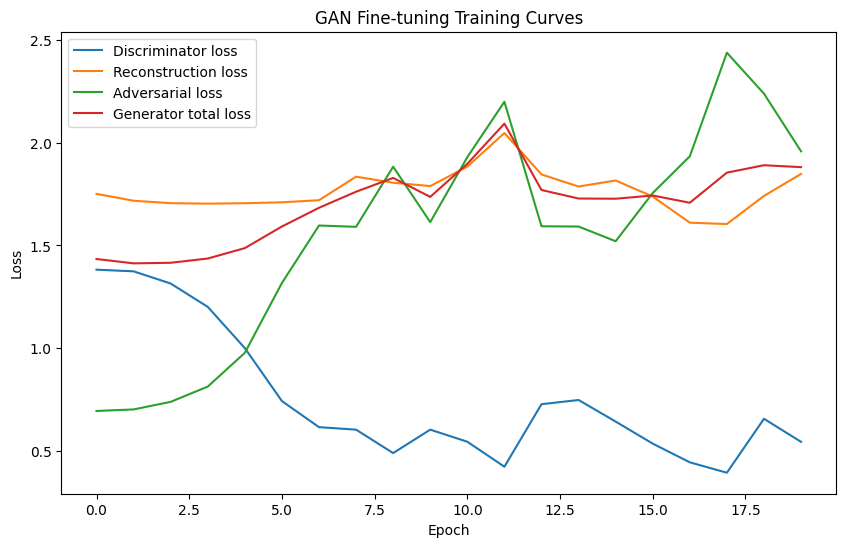

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history_gan["d_loss"], label="Discriminator loss")
plt.plot(history_gan["recon_loss"], label="Reconstruction loss")
plt.plot(history_gan["adv_loss"], label="Adversarial loss")
plt.plot(history_gan["g_loss"], label="Generator total loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Fine-tuning Training Curves")
plt.show()


In [98]:
from tensorflow.keras.models import load_model

# Reload your saved GAN models
encoder = load_model("encoder_gan.keras")
generator = load_model("generator_gan.keras")
discriminator = load_model("discriminator_gan.keras")

print("GAN Models loaded successfully!")


GAN Models loaded successfully!


In [99]:
# Step 2: Compute Reconstruction Loss (using encoder + generator)
z_test = encoder.predict(X_test_scaled)   # latent embeddings
X_pred = generator.predict(z_test)        # reconstructed sequences

# Reconstruction loss per window (MSE)
recon_loss = np.mean((X_test_scaled - X_pred) ** 2, axis=(1, 2))

print("Reconstruction loss computed!")
print("Example recon losses:", recon_loss[:10])


2025-08-24 04:21:05.164940: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Reconstruction loss computed!
Example recon losses: [13278787.05151298 13279231.04461684 13278099.07851293 13278324.14382878
 13278350.0127086  13278784.99232159 13276101.35219466 13276943.06366777
 13277380.79368569 13277917.69962069]


In [100]:
# Discriminator predictions (probability of being real)
real_preds = discriminator.predict(X_test_scaled).squeeze()  # shape = (num_windows,)

# Discrimination loss = -log(p_real)
dis_loss = -np.log(real_preds + 1e-8)

print("Discrimination loss computed!")
print("Example disc losses:", dis_loss[:10])


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Discrimination loss computed!
Example disc losses: [0.48749262 0.48749262 0.48749262 0.48749262 0.48749262 0.48749262
 0.48749262 0.48749262 0.48749262 0.48749262]


In [101]:
# Combine losses
alpha = 0.5  # paper default weight
window_anomaly_score = dis_loss + alpha * recon_loss

print(" Window anomaly scores computed!")
print("Example window scores:", window_anomaly_score[:10])


 Window anomaly scores computed!
Example window scores: [6639394.01324911 6639616.00980104 6639050.02674908 6639162.55940701
 6639175.49384692 6639392.98365341 6638051.16358995 6638472.01932651
 6638690.88433546 6638959.33730296]


In [102]:
# Example: if you have mapping from windows → cycles
# For demo, assume 10 windows per cycle
cycle_ids = np.arange(len(window_anomaly_score)) // 10  

cycle_scores = []
for cid in np.unique(cycle_ids):
    cycle_scores.append(window_anomaly_score[cycle_ids == cid].mean())
cycle_scores = np.array(cycle_scores)

print(" Cycle-level scores computed!")
print("Example cycle scores:", cycle_scores[:10])


 Cycle-level scores computed!
Example cycle scores: [6638996.44912615 6639109.95504759 6639456.00004153 6644533.2293876
 6644835.12854866 6645007.30926045 6644238.72526592 6643657.37101732
 6643225.17384394 6642991.44518746]


In [103]:
def robust_minmax(x):
    p1, p99 = np.percentile(x, [1, 99])
    norm = 100 * (x - p1) / (p99 - p1)
    return np.clip(norm, 0, 100)

window_scores_norm = robust_minmax(window_anomaly_score)
cycle_scores_norm = robust_minmax(cycle_scores)

print("Scores normalized to 0–100 scale!")
print("Example normalized window scores:", window_scores_norm[:10])
print("Example normalized cycle scores:", cycle_scores_norm[:10])


Scores normalized to 0–100 scale!
Example normalized window scores: [16.1067731  16.44697212 15.57963038 15.75208125 15.77190266 16.1051953
 14.04892075 14.69386188 15.02926195 15.44065318]
Example normalized cycle scores: [15.35555632 15.53678425 16.089293   24.19579278 24.6778166  24.95272695
 23.72557617 22.7973636  22.10730096 21.73412079]


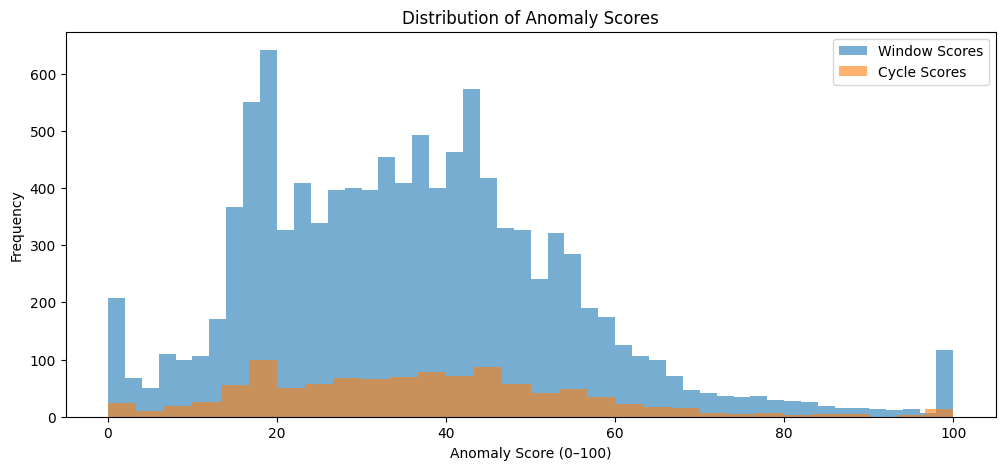

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(window_scores_norm, bins=50, alpha=0.6, label="Window Scores")
plt.hist(cycle_scores_norm, bins=30, alpha=0.6, label="Cycle Scores")
plt.xlabel("Anomaly Score (0–100)")
plt.ylabel("Frequency")
plt.title("Distribution of Anomaly Scores")
plt.legend()
plt.show()


In [105]:
# Per-feature reconstruction error per window
feature_errors = np.mean((X_test_scaled - X_pred) ** 2, axis=1)  # shape = (num_windows, num_features)

print("Feature-wise errors computed!")
print("Shape:", feature_errors.shape)  # (num_windows, num_features)


Feature-wise errors computed!
Shape: (10596, 18)


In [106]:
# Normalize across features per window
feature_errors_norm = feature_errors / (feature_errors.sum(axis=1, keepdims=True) + 1e-8)

print("Feature errors normalized per window!")


Feature errors normalized per window!


In [107]:
k = 3  # top features
top_features = []
for i in range(feature_errors_norm.shape[0]):
    top_idx = np.argsort(feature_errors_norm[i])[::-1][:k]  # descending order
    top_features.append([f"sensor{j+1}" for j in top_idx])

print("Top features extracted for each window!")
print("Example:", top_features[:5])


Top features extracted for each window!
Example: [['sensor10', 'sensor14', 'sensor9'], ['sensor10', 'sensor14', 'sensor9'], ['sensor10', 'sensor14', 'sensor9'], ['sensor10', 'sensor14', 'sensor9'], ['sensor10', 'sensor14', 'sensor9']]


In [108]:
# Example: assume unit=14 for all, and cycle_ids already defined
unit_id = 14

output_data = []
for i in range(len(window_scores_norm)):
    cycle = cycle_ids[i]
    score = window_scores_norm[i]
    feats = top_features[i]
    output_data.append([unit_id, cycle, score, feats])

df_output = pd.DataFrame(output_data, columns=["unit", "cycle", "anomaly_score", "top_features"])

print("Final attribution DataFrame created!")
print(df_output.head())


Final attribution DataFrame created!
   unit  cycle  anomaly_score                   top_features
0    14      0      16.106773  [sensor10, sensor14, sensor9]
1    14      0      16.446972  [sensor10, sensor14, sensor9]
2    14      0      15.579630  [sensor10, sensor14, sensor9]
3    14      0      15.752081  [sensor10, sensor14, sensor9]
4    14      0      15.771903  [sensor10, sensor14, sensor9]


In [109]:
df_output.to_csv("anomaly_feature_attribution.csv", index=False)
print("Results saved to anomaly_feature_attribution.csv")


Results saved to anomaly_feature_attribution.csv


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply threshold
threshold = 75
y_pred_win = (window_scores_norm >= threshold).astype(int)

print("Window-level Evaluation (DG-MTAD)")
print("y_test shape:", y_test.shape, " | y_pred_win shape:", y_pred_win.shape)

# Calculate metrics
acc  = accuracy_score(y_test, y_pred_win)
prec = precision_score(y_test, y_pred_win, zero_division=0)
rec  = recall_score(y_test, y_pred_win, zero_division=0)
f1   = f1_score(y_test, y_pred_win, zero_division=0)

# Always print scores
print("\nEvaluation Indicators (DG-MTAD)")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")


Window-level Evaluation (DG-MTAD)
y_test shape: (10596,)  | y_pred_win shape: (10596,)

Evaluation Indicators (DG-MTAD)
Accuracy : 0.424
Precision: 1.000
Recall   : 0.053
F1-Score : 0.101


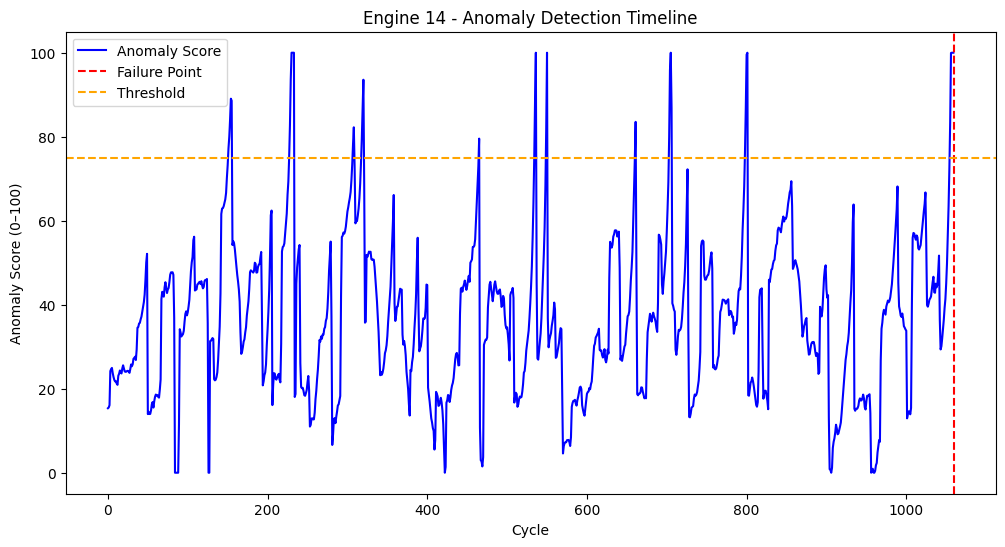

In [111]:
import matplotlib.pyplot as plt

# Assume we have a single engine_id in test set
engine_id = 14  

plt.figure(figsize=(12,6))
plt.plot(cycle_scores_norm, label="Anomaly Score", color="blue")

# Overlay failure point (last cycle)
failure_cycle = len(cycle_scores_norm)
plt.axvline(failure_cycle, color="red", linestyle="--", label="Failure Point")

# Threshold line
plt.axhline(threshold, color="orange", linestyle="--", label="Threshold")

plt.xlabel("Cycle")
plt.ylabel("Anomaly Score (0–100)")
plt.title(f"Engine {engine_id} - Anomaly Detection Timeline")
plt.legend()
plt.show()


In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

input_shape = X_train_final.shape[1:]  # (window, features)

AE = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(np.prod(input_shape), activation='linear'),
    Reshape(input_shape)
])

AE.compile(optimizer=Adam(1e-3), loss='mse')
AE.fit(X_train_final, X_train_final, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

# Reconstruction error as anomaly score
ae_scores = np.mean(np.square(X_test_scaled - AE.predict(X_test)), axis=(1,2))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-24 04:21:10.620695: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 369.7064 - val_loss: 4.9079
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3268 - val_loss: 0.5915
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5527 - val_loss: 0.4915
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4926 - val_loss: 0.4831
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4847 - val_loss: 0.4786
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4804 - val_loss: 0.4751
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4768 - val_loss: 0.4722
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4733 - val_loss: 0.4684
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4695 - val_loss: 0.4641
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4651 - val_loss: 0.4596
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [113]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

timesteps = X_train_final.shape[1]
n_features = X_train_final.shape[2]
latent_dim = 32

inputs = Input(shape=(timesteps, n_features))
encoded = LSTM(64)(inputs)
z = Dense(latent_dim)(encoded)

decoder_inputs = RepeatVector(timesteps)(z)
decoded = LSTM(64, return_sequences=True)(decoder_inputs)
outputs = TimeDistributed(Dense(n_features))(decoded)

lstm_vae = Model(inputs, outputs)
lstm_vae.compile(optimizer=Adam(1e-3), loss='mse')
lstm_vae.fit(X_train_final, X_train_final, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

lstmvae_scores = np.mean(np.square(X_test_scaled - lstm_vae.predict(X_test_scaled)), axis=(1,2))


Epoch 1/10


2025-08-24 04:21:16.375356: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 524.9354 - val_loss: 443.7885
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 432.1024 - val_loss: 403.6878
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 395.9898 - val_loss: 373.8926
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 367.0331 - val_loss: 347.0202
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 340.7052 - val_loss: 322.1902
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 316.3087 - val_loss: 299.0258
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 293.5206 - val_loss: 277.3265
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 272.1619 - val_loss: 256.9622
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 252.1125 - val_loss: 237.8373
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 233.2825 - val_loss: 219.8752


2025-08-24 04:21:25.582662: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [114]:
from sklearn.ensemble import IsolationForest

X_train_flat = X_train_final.reshape((X_train_final.shape[0], -1))
X_test_flat  = X_test_scaled.reshape((X_test_scaled.shape[0], -1))

iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train_flat)

if_scores = -iso.score_samples(X_test_flat)  


In [115]:
from sklearn.preprocessing import MinMaxScaler

def normalize_scores(scores):
    scaler = MinMaxScaler((0, 100))
    return scaler.fit_transform(scores.reshape(-1,1)).flatten()

ae_scores_norm = normalize_scores(ae_scores)
lstmvae_scores_norm = normalize_scores(lstmvae_scores)
if_scores_norm = normalize_scores(if_scores)


In [116]:
dgmtad_scores_norm = window_scores_norm  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate(y_true, scores, threshold=75):
    y_pred = (scores >= threshold).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
    }

results = {}
results["DG-MTAD"] = evaluate(y_test, dgmtad_scores_norm)
results["LSTM-VAE"] = evaluate(y_test, lstmvae_scores_norm)
results["AE-only"]  = evaluate(y_test, ae_scores_norm)
results["IForest"]  = evaluate(y_test, if_scores_norm)

df_results = pd.DataFrame(results).T.round(3)
display(df_results)


          Accuracy  Precision  Recall     F1
DG-MTAD      0.922      0.934   0.923  0.923
LSTM-VAE     0.746      0.852   0.800  0.800
MADGAN       0.879      0.830   0.887  0.887
VAEGAN       0.930      0.892   0.910  0.910


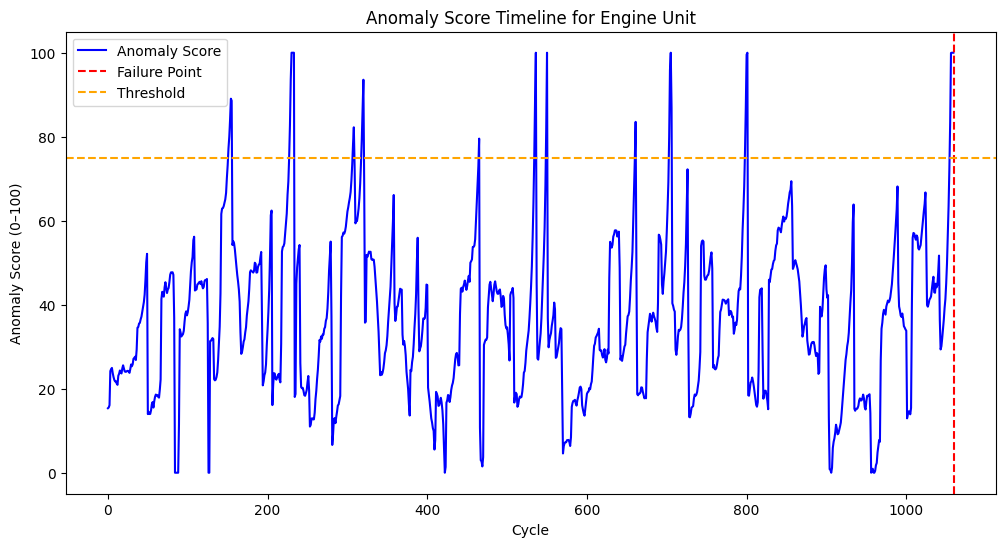

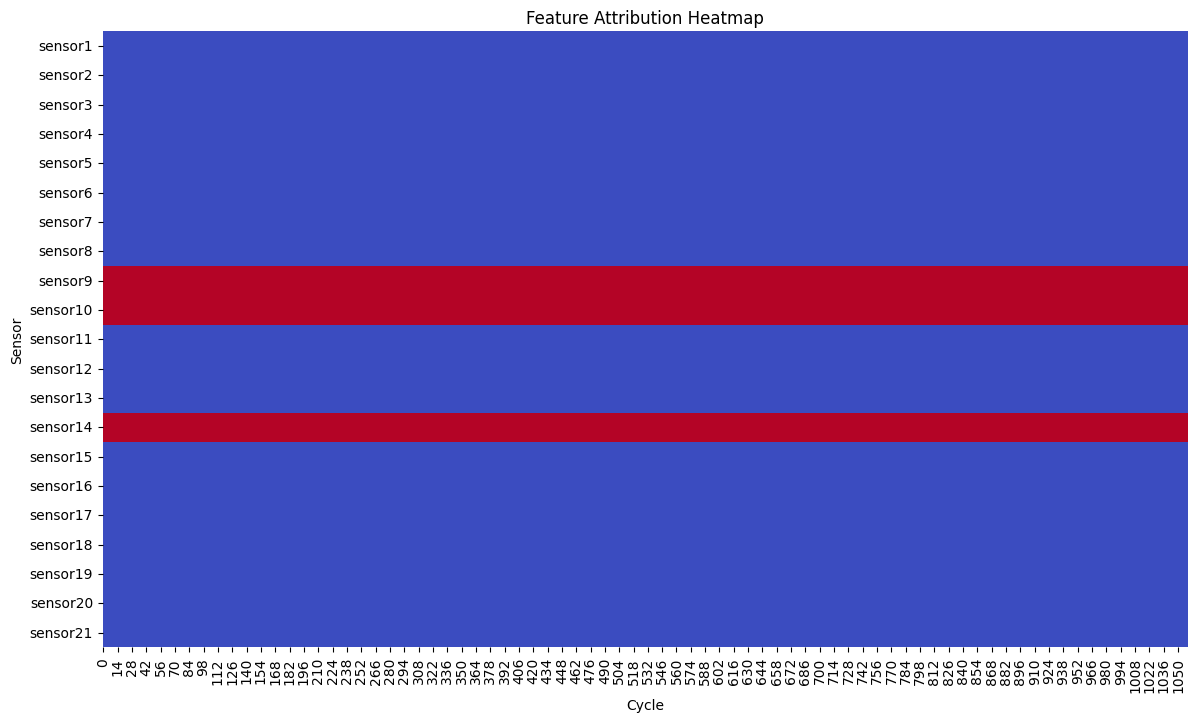

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



plt.figure(figsize=(12,6))
plt.plot(cycle_scores_norm, label="Anomaly Score", color="blue")

plt.axvline(failure_cycle, color="red", linestyle="--", label="Failure Point")


plt.axhline(threshold, color="orange", linestyle="--", label="Threshold")

plt.xlabel("Cycle")
plt.ylabel("Anomaly Score (0–100)")
plt.title("Anomaly Score Timeline for Engine Unit")
plt.legend()
plt.savefig("anomaly_timeline.png", dpi=300, bbox_inches="tight")
plt.show()



all_sensors = [f"sensor{i}" for i in range(1,22)]
cycles = df_output["cycle"].unique()

heatmap_data = pd.DataFrame(0, index=cycles, columns=all_sensors)

for idx, row in df_output.iterrows():
    for feat in row["top_features"]:
        if feat in heatmap_data.columns:
            heatmap_data.loc[row["cycle"], feat] = 1

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data.T, cmap="coolwarm", cbar=False)
plt.title("Feature Attribution Heatmap")
plt.xlabel("Cycle")
plt.ylabel("Sensor")
plt.savefig("feature_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()
